In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import scipy.stats as stats

main_font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **main_font)

cm = 1/2.54 

In [2]:
def box_violin(data, position, color, ax):

    if not isinstance(position, list):
        position = [position]
    #plot violin
    parts = ax.violinplot(data, positions=position, vert=True,
                showmeans=False, showmedians=False,showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.4)

    # plot boxplot
    ax.boxplot(data, positions=position, vert=True,
               showmeans=False, meanline=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='k', linewidth=0.5),
               medianprops=dict(color='k' ),
               whiskerprops=dict(linewidth=0.5),
               flierprops =dict(markersize=1, marker='o'),
               # meanprops=dict(color='k',linestyle = ':')
               )

In [3]:
def set_up():
    # set up the figure 
    fig, ax = plt.subplots(1,2, figsize= (14*cm, 9*cm), sharey=True )
    plt.subplots_adjust(left=0.1, bottom=0.3, right=0.99, top=.93, wspace=0.1, hspace=None)

    ax[0].set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    ax[0].set_yticklabels([.1,'',.3,'',.5,'',.7,'',.9, ''])
    [a.grid(which='major', color='#666666', linestyle='-', axis='y', alpha=0.5) for a in ax]
    ax[0].set_ylabel('DSC$_p$')

    x_ticks=[1,1.5, 2.5,3]
    [a.set(xticks=x_ticks, 
           xticklabels=['']*len(x_ticks),
           xlim = (min(x_ticks)-.5, max(x_ticks)+.5)) for a in ax]
    return fig, ax, x_ticks
    

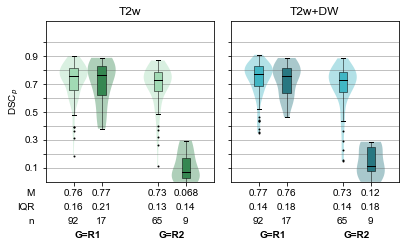

In [4]:
data_T2 = [[],[],[], []]
data_T2[0] = pd.read_csv(r'D:\BiGART_results\bigart_55_56_57_58_59_patient.csv')['f1_score']
data_T2[1] = pd.read_csv(r'D:\BiGART_results\bigart_55_prediction_test_voted.csv')['f1_score']
data_T2[2] = pd.read_csv(r'D:\BiGART_results\bigart_55_56_57_58_59_patient_otherDelineation.csv')['f1_score']
data_T2[3] = pd.read_csv(r'D:\BiGART_results\voted_test_bigart_55\patient_otherDelineation.csv')['f1_score']

data_T2DW = [[],[],[], []]
# data_T2DW[0] = pd.read_csv(r'D:\BiGART_results\bigart_65_66_67_68_69_patient.csv')['f1_score']
# data_T2DW[1] = pd.read_csv(r'D:\BiGART_results\bigart_65_prediction_test_voted.csv')['f1_score']
# data_T2DW[2] = pd.read_csv(r'D:\BiGART_results\bigart_65_66_67_68_69_patient_otherDelineation.csv')['f1_score']

data_T2DW[0] = pd.read_csv(r'D:\BiGART_results\bigart_10_11_12_13_14_patient.csv')['f1_score']
data_T2DW[1] = pd.read_csv(r'D:\BiGART_results\bigart_10_prediction_test_voted.csv')['f1_score']
data_T2DW[2] = pd.read_csv(r'D:\BiGART_results\bigart_10_11_12_13_14_patient_otherDelineation.csv')['f1_score']
data_T2DW[3] = pd.read_csv(r'D:\BiGART_results\voted_test_bigart_10\patient_otherDelineation.csv')['f1_score']

colors_T2 = ('#a1dab4', '#358751' , '#a1dab4', '#358751')
colors_DW  =('#41b6c4', '#287781', '#41b6c4', '#287781')


fig, ax, positions = set_up()

for d, p, c in zip(data_T2, positions, colors_T2):
    box_violin(d.to_list(), p, c, ax[0])
    
    ds = d.describe()
    ax[0].text(p, -0.1, '{:.02}'.format(ds['50%']), ha='center')
    ax[0].text(p, -0.2, '{:.02}'.format(ds['75%']-ds['25%']), ha='center')
    ax[0].text(p, -0.3, '{}'.format(int(ds['count'])) ,ha='center')
ax[0].text(0.3,-0.1, 'M',ha='right')
ax[0].text(0.3,-0.2, 'IQR',ha='right')
ax[0].text(0.3,-0.3, 'n',ha='right')

ax[0].text(1.25, -0.4, 'G=R1', ha='center', fontweight='bold')
ax[0].text(2.75, -0.4, 'G=R2', ha='center', fontweight='bold')

for d, p, c in zip(data_T2DW, positions, colors_DW):
    if len(d) >0:
        box_violin(d.to_list(), p, c, ax[1])
        ds = d.describe()
        ax[1].text(p, -0.1, '{:.02}'.format(ds['50%']), ha='center')
        ax[1].text(p, -0.2, '{:.02}'.format(ds['75%']-ds['25%']), ha='center')
        ax[1].text(p, -0.3, '{}'.format(int(ds['count'])) ,ha='center')


ax[1].text(1.25, -0.4, 'G=R1', ha='center', fontweight='bold')
ax[1].text(2.75, -0.4, 'G=R2', ha='center', fontweight='bold')

[a.set(xticks=positions, 
           xticklabels=['']*len(positions),
           xlim = (min(positions)-.5, max(positions)+.5),
            ylim=(0,1.15)) for a in ax]

ax[0].set_title('T2w')
ax[1].set_title('T2w+DW')

plt.savefig('Fig_2.pdf',
               dpi=300)

In [8]:
def comb_train_test(train, test):
    return train.to_list()+test.to_list()

d_R1_T2 = comb_train_test(data_T2[0], data_T2[1])
d_R1_T2DW = comb_train_test(data_T2DW[0], data_T2DW[1])

s = stats.wilcoxon(
    d_R1_T2, d_R1_T2DW,
    zero_method='wilcox',
    correction=False,
    alternative='two-sided',
    mode='auto'
)

print('T2:\t M={:.02},\tIQR={:.02}'.format(np.median(d_R1_T2), np.quantile(d_R1_T2, 0.75)-np.quantile(d_R1_T2, 0.25) ) )
print('T2+DW:\t M={:.02},\tIQR={:.02}'.format(np.median(d_R1_T2DW), np.quantile(d_R1_T2DW, 0.75)-np.quantile(d_R1_T2DW, 0.25) ))
print(s)


T2:	 M=0.76,	IQR=0.16
T2+DW:	 M=0.77,	IQR=0.15
WilcoxonResult(statistic=2487.0, pvalue=0.12274131772677464)


In [6]:
# TODO make a exel file and select the same subset of patients


# d_R1_T2 = comb_train_test(data_T2[0], data_T2[1])
# d_R2_T2 = comb_train_test(data_T2[2], data_T2[3])

# s = stats.Man(
#     d_R1_T2, d_R2_T2,
#     zero_method='wilcox',
#     correction=False,
#     alternative='two-sided',
#     mode='auto'
# )

# print('T2_R1:\t M={:.02},\tIQR={:.02}'.format(np.mean(d_R1_T2), np.quantile(d_R1_T2, 0.75)-np.quantile(d_R1_T2, 0.25) ) )
# print('T2_R2:\t M={:.02},\tIQR={:.02}'.format(np.mean(d_R2_T2), np.quantile(d_R2_T2, 0.75)-np.quantile(d_R2_T2, 0.25) ))
# print(s)
